In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cbuckle = pd.read_csv("data/cbuckle_error_iter_analysis.csv")
cbuckle.head()

,mat_name,errorfree_iterations,tol,maxiter,error_pos,error_iter,solve_iterations,final_relres,did_converge,realtime_s,pos_2norm
0,cbuckle.mat,341,0.000001,34100,11695,1,343,9.582928e-07,True,0.232769,528.571697
1,cbuckle.mat,341,0.000001,34100,11695,85,370,9.504043e-07,True,0.261692,528.571697
2,cbuckle.mat,341,0.000001,34100,11695,170,437,9.710608e-07,True,0.296028,528.571697
3,cbuckle.mat,341,0.000001,34100,11695,255,412,9.743126e-07,True,0.279333,528.571697
4,cbuckle.mat,341,0.000001,34100,11695,340,340,7.509300e-07,True,0.232940,528.571697


In [3]:
bcsstk18 = pd.read_csv("data/bcsstk18_error_iter_analysis.csv")
bcsstk18.head()

,mat_name,errorfree_iterations,tol,maxiter,error_pos,error_iter,solve_iterations,final_relres,did_converge,realtime_s,pos_2norm
0,bcsstk18.mat,432,0.000001,43200,4579,1,457,9.610631e-07,True,0.167123,3171.639746
1,bcsstk18.mat,432,0.000001,43200,4579,107,455,9.840274e-07,True,0.165476,3171.639746
2,bcsstk18.mat,432,0.000001,43200,4579,215,445,9.944201e-07,True,0.161749,3171.639746
3,bcsstk18.mat,432,0.000001,43200,4579,323,446,9.985262e-07,True,0.164016,3171.639746
4,bcsstk18.mat,432,0.000001,43200,4579,430,430,8.624661e-07,True,0.155704,3171.639746


In [4]:
g_cbuckle = cbuckle.groupby("error_iter")
iters_cbuckle = cbuckle["errorfree_iterations"].min()  # all same value
g_bcsstk18 = bcsstk18.groupby("error_iter")
iters_bcsstk18 = bcsstk18["errorfree_iterations"].min()  # all same value
cs = ["red", "green", "blue", "orange", "magenta"]
ms = ["o", "v", "^", "<", ">"]

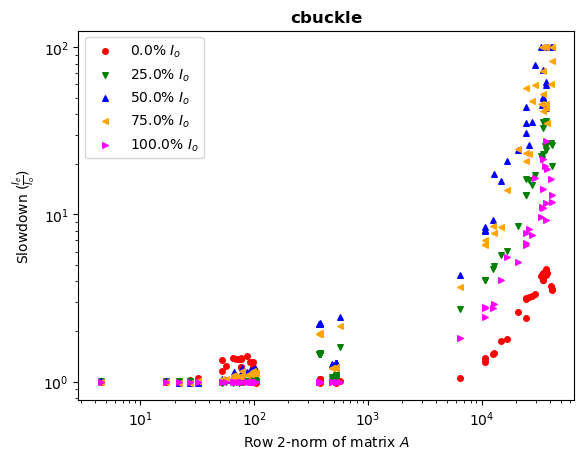

In [5]:
plt.title(r"$\bf cbuckle$")
plt.xlabel("Row 2-norm of matrix $A$")
plt.xscale("log")
plt.ylabel("Slowdown $(\\frac{I_e}{I_o})$")
plt.yscale("log")

for i, (gname, data) in enumerate(g_cbuckle):
    plt.scatter(data["pos_2norm"], data["solve_iterations"] / data["errorfree_iterations"],
                c=cs[i], marker=ms[i], s=16, label=f"{round(gname / iters_cbuckle, 2)*100}% $I_o$")

plt.legend()
plt.show()

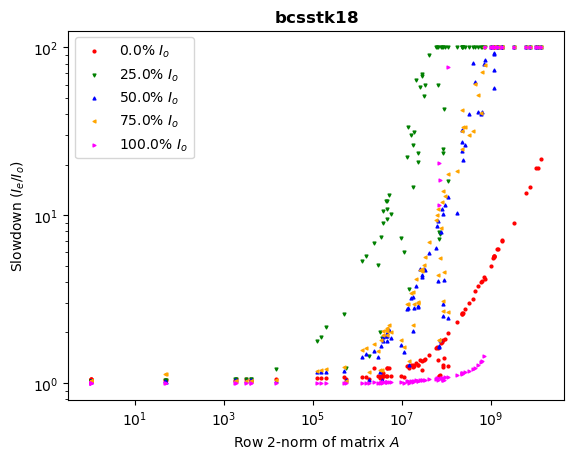

In [6]:
plt.title(r"$\bf bcsstk18$")
plt.xlabel("Row 2-norm of matrix $A$")
plt.xscale("log")
plt.ylabel("Slowdown ($I_e$/$I_o$)")
plt.yscale("log")

for i, (gname, data) in enumerate(g_bcsstk18):
    plt.scatter(data["pos_2norm"], data["solve_iterations"] / data["errorfree_iterations"],
                c=cs[i], marker=ms[i], s=4, label=f"{round(gname / iters_bcsstk18, 2)*100}% $I_o$")

plt.legend()
plt.show()

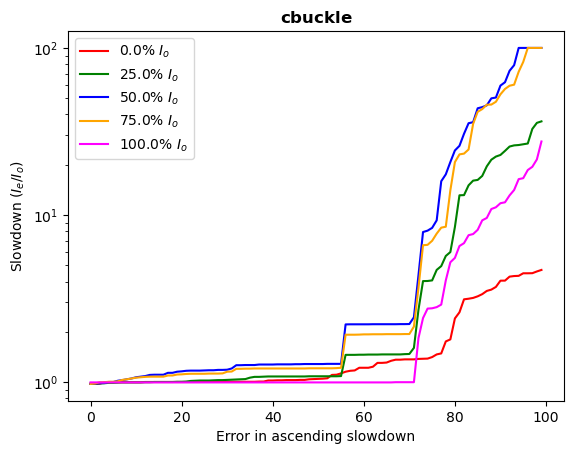

In [7]:
plt.title(r"$\bf cbuckle$")
plt.xlabel("Error in ascending slowdown")
plt.ylabel("Slowdown ($I_e$/$I_o$)")
plt.yscale("log")

for i, (gname, data) in enumerate(g_cbuckle):
    s = data[["solve_iterations", "errorfree_iterations"]].sort_values("solve_iterations")
    plt.plot(range(len(data)), s["solve_iterations"] / s["errorfree_iterations"],
                c=cs[i], label=f"{round(gname / iters_cbuckle, 2)*100}% $I_o$")

plt.legend()
plt.show()

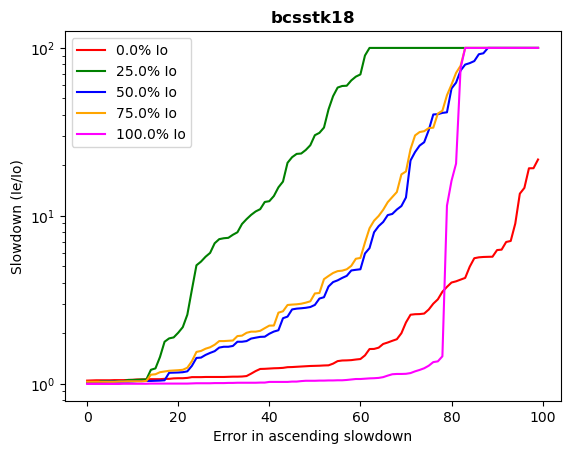

In [8]:
plt.title(r"$\bf bcsstk18$")
plt.xlabel("Error in ascending slowdown")
plt.ylabel("Slowdown (Ie/Io)")
plt.yscale("log")

for i, (gname, data) in enumerate(g_bcsstk18):
    s = data[["solve_iterations", "errorfree_iterations"]].sort_values("solve_iterations")
    plt.plot(range(len(data)), s["solve_iterations"] / s["errorfree_iterations"],
                c=cs[i], label=f"{round(gname / iters_bcsstk18, 2)*100}% Io")

plt.legend()
plt.show()